# Clustering (Airline) - Assignment 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
xlsx = pd.ExcelFile('EastWestAirlines.xlsx')
description = pd.read_excel(xlsx, 'Description')
df = pd.read_excel(xlsx, 'data')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data = df.drop(["ID#"], axis= 1)

In [6]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


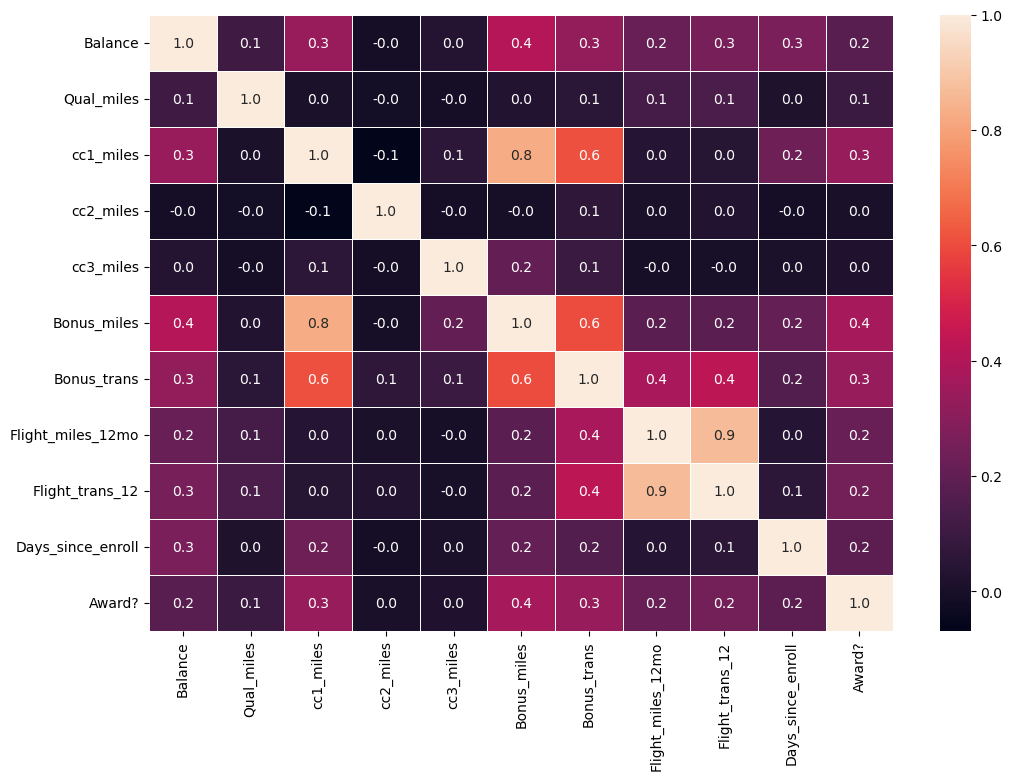

In [7]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3999, 11)

In [9]:
minmax_df

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

# Kmeans Clustering

In [10]:
from sklearn.cluster import KMeans

### Elbow Curve

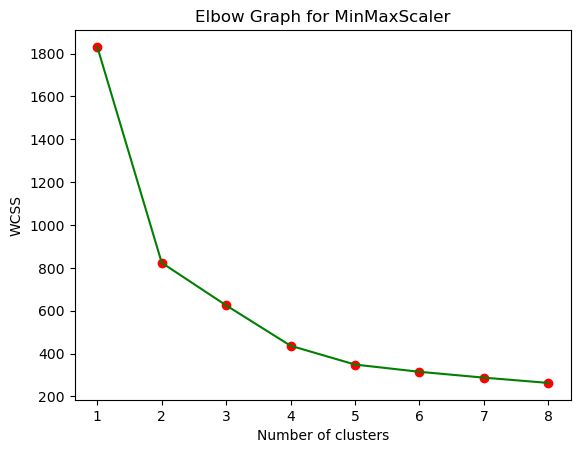

In [11]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'g')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters is 4

### Build KMeans Cluster algorithm using K = 4 

In [12]:
model_kmeans = KMeans(n_clusters=4)
model_kmeans.fit(minmax_df)

KMeans(n_clusters=4)

In [13]:
model_kmeans.fit(minmax_df).cluster_centers_

array([[ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01, -4.44089210e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -2.22044605e-16]])

In [14]:
model_kmeans.fit(minmax_df).labels_

array([2, 2, 2, ..., 1, 2, 2])

In [15]:
data["K_labels"]=pd.Series(model_kmeans.labels_)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [16]:
for i in np.array([0,1,2,3]):
    print('Records that belong to Cluster Index',i)
    display(data[data["K_labels"] == i])
    print('\n')

Records that belong to Cluster Index 0


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K_labels
6,84914,0,3,1,1,27482,25,0,0,6994,0,0
30,177926,0,3,1,1,20797,13,0,0,7886,0,0
32,276571,0,4,1,1,42044,23,0,0,7872,0,0
44,121260,0,3,1,1,18493,18,0,0,7808,0,0
56,75971,0,4,1,1,34339,14,0,0,6869,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3966,91605,0,4,1,1,37840,18,0,0,1444,0,0
3974,58387,0,3,1,1,14581,39,0,0,1435,0,0
3980,28867,0,3,1,1,19169,28,0,0,1425,0,0
3985,59017,0,4,1,1,34746,25,0,0,1418,0,0




Records that belong to Cluster Index 1


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K_labels
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,28495,0,4,1,1,49442,15,0,0,6912,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3931,49519,0,3,1,1,25762,18,0,0,1522,1,1
3954,33972,0,3,1,1,21029,29,0,0,1467,1,1
3973,72297,0,3,1,1,16241,16,0,0,1587,1,1
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,1




Records that belong to Cluster Index 2


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
5,16420,0,1,1,1,0,0,0,0,6942,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,11310,0,1,1,1,5021,2,0,0,1409,0,2
3992,11181,0,1,1,1,929,12,0,0,1407,0,2
3993,3974,0,1,1,1,365,3,0,0,1397,0,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,2




Records that belong to Cluster Index 3


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K_labels
7,20856,0,1,1,1,5250,4,250,1,6938,1,3
17,13958,0,1,1,1,4291,5,0,0,6905,1,3
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,3
29,19221,0,1,1,1,4655,8,500,1,7896,1,3
36,23193,0,1,1,1,650,4,550,3,7861,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3978,10071,0,2,1,1,27701,16,0,0,1421,1,3
3987,11933,0,1,1,1,249,3,79,1,1412,1,3
3989,2622,0,1,1,1,1625,6,0,0,1404,1,3
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3


In [17]:
data[data["K_labels"] == 0].shape

(621, 12)

In [18]:
data[data["K_labels"] == 1].shape

(808, 12)

In [19]:
data[data["K_labels"] == 2].shape

(1897, 12)

In [20]:
data[data["K_labels"] == 3].shape

(673, 12)

# Hierarchical Clustering

In [24]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

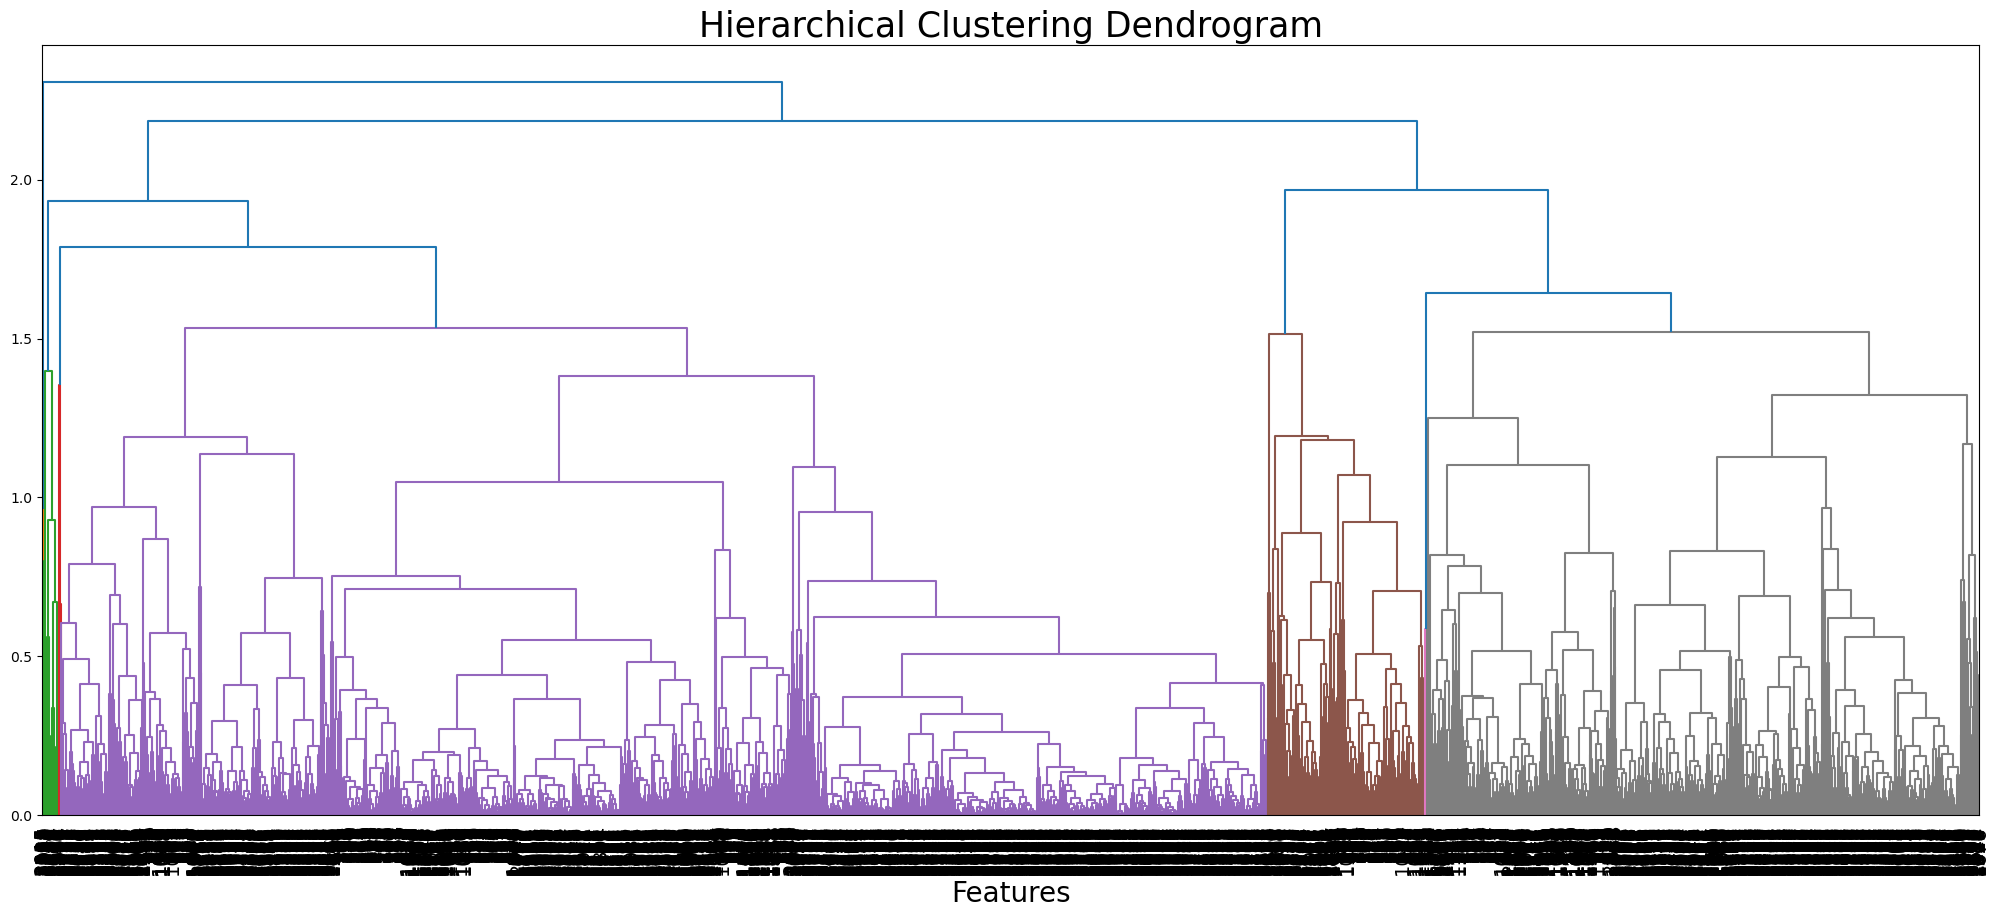

In [22]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram',fontsize=25)
plt.xlabel('Features',fontsize= 20)
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='complete'),orientation='top', leaf_font_size=14)

For n_clusters = 2 The average silhouette_score is : 0.47040913679492186
For n_clusters = 3 The average silhouette_score is : 0.5318787367232326
For n_clusters = 4 The average silhouette_score is : 0.46459708515197673
For n_clusters = 5 The average silhouette_score is : 0.4167248248554338
For n_clusters = 6 The average silhouette_score is : 0.4172318835123988
For n_clusters = 7 The average silhouette_score is : 0.4161868994032843
For n_clusters = 8 The average silhouette_score is : 0.39120686651419934
For n_clusters = 9 The average silhouette_score is : 0.35190300606505326
For n_clusters = 10 The average silhouette_score is : 0.3522324604386131


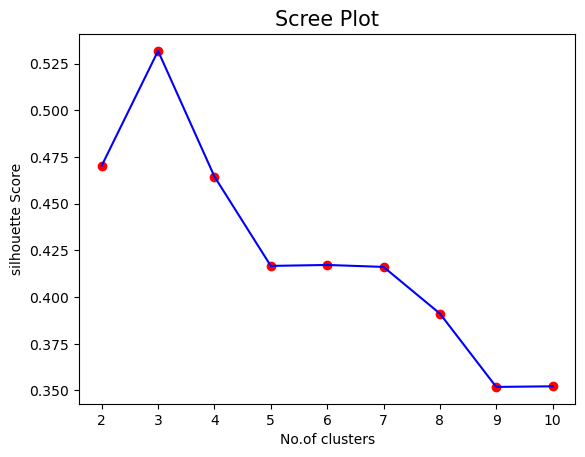

In [25]:
nc=range(2,11)
sc_score=[]    
for i in range(2,11):
    clusterer = AgglomerativeClustering(n_clusters= i , affinity='euclidean', linkage='complete')
    y = clusterer.fit_predict(minmax_df)

    silhouette_avg = silhouette_score(minmax_df, y)
    sc_score.append(silhouette_score(minmax_df,y))
    print("For n_clusters =", i ,
          "The average silhouette_score is :", silhouette_avg)
    
plt.title('Scree Plot',fontsize=15)
plt.xlabel('No.of clusters',fontsize= 10)
plt.ylabel('silhouette Score', fontsize= 10)
plt.plot(nc,sc_score,color="blue")
plt.scatter(nc,sc_score,color="red")
plt.show()

Scree plot indicate that 3 is the optimal number for clusters.

In [26]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [27]:
hc.fit_predict(minmax_df)

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [28]:
data['H_clusterid'] = hc.fit_predict(minmax_df)

In [29]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K_labels,H_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,3,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2,2


In [31]:
for i in np.array([0,1,2]):
    print('Records that belong to Cluster Index',i)
    display(data[data["H_clusterid"] == i])
    print('\n')

Records that belong to Cluster Index 0


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K_labels,H_clusterid
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0
7,20856,0,1,1,1,5250,4,250,1,6938,1,3,0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1,0
11,96522,0,5,1,1,61105,19,0,0,6924,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,3,0
3989,2622,0,1,1,1,1625,6,0,0,1404,1,3,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,3,0




Records that belong to Cluster Index 1


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K_labels,H_clusterid
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,1,1
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3,1
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,3,1
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,1,1




Records that belong to Cluster Index 2


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K_labels,H_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2,2
5,16420,0,1,1,1,0,0,0,0,6942,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,39142,0,3,1,1,14981,28,0,0,1408,0,0,2
3992,11181,0,1,1,1,929,12,0,0,1407,0,2,2
3993,3974,0,1,1,1,365,3,0,0,1397,0,2,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,2,2


# DBSCAN

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [33]:
from itertools import product
eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [34]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(minmax_df, DBS_clustering.labels_))

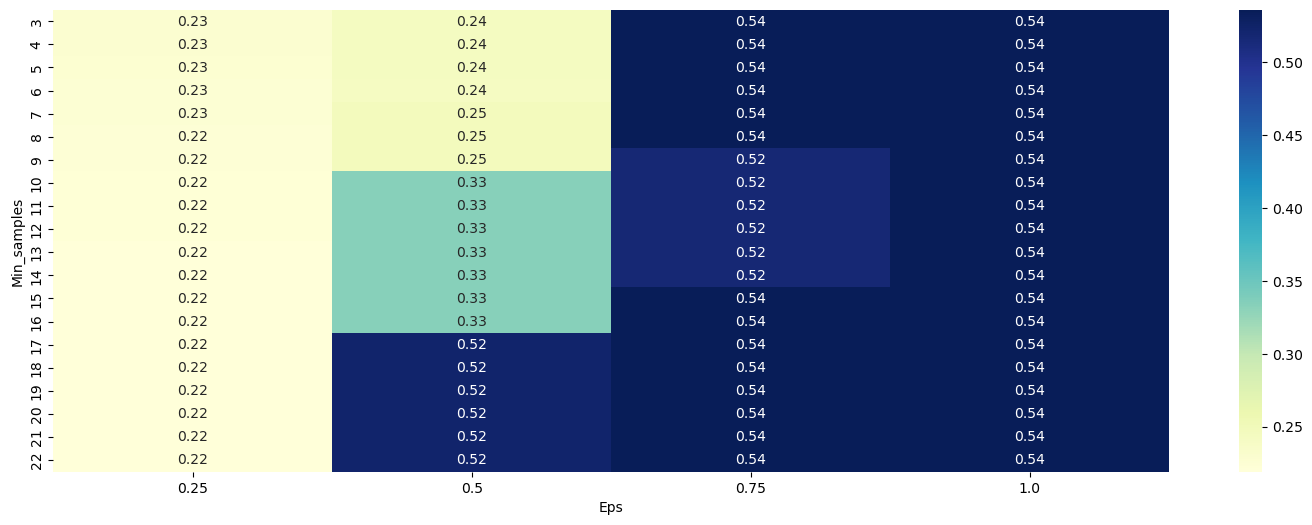

In [35]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.54 for eps=1.0 and min_samples=from 22 to 3

### Hyperparametric Tuning

In [36]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = silhouette_score(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.5359


### Building DBSCAN Model for epsilon 1 and min_samle = 11

In [37]:
dbs = DBSCAN(eps=1, min_samples= 11)
dbs.fit(st_data)

NameError: name 'st_data' is not defined

In [ ]:
clusters = dbs.labels_
clusters

In [ ]:
data['DBS_clusterID'] = dbs.labels_

In [ ]:
data

In [ ]:
for i in np.array([-1,0,1]):
    print('Records that belong to Cluster Index',i)
    print(data[data["DBS_clusterID"] == i].drop(['H_clusterid','K_labels'],axis=1))
    print('\n')